In [148]:
import pandas as pd
import numpy as np
import re

## Loading the data

Generating a data frame from the csv Shark Attacks

In [65]:
#ande están los datos? cómo los convertimos en la principal estructura de los pandas - un dataframe?
sharks_original = pd.read_csv("attacks.csv",encoding = 'latin-1', parse_dates=['Date'])
#Hago una copia de seguridad como ha hecho el señor tan amable de Kaggle
sharks = sharks_original.copy()

## Previewing the data 
Getting familiar with the information

In [66]:
#qué tipo de estructura de datos estamos tratando?
type(sharks)

pandas.core.frame.DataFrame

In [67]:
#qué tipo de datos tenemos en el dataframe?
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Conclusiones iniciales:
- Todas las columnas tienen entre un 75% y un 50% de datos nulos
- Hay columnas (de la 16 a la 23) cuyo propósito no está claro
- El formato de la mayoría de las columnas es object

In [68]:
#qué dimensiones tiene el df?
sharks.shape

(25723, 24)

In [69]:
#qué tal pintan las primeras filas del df?
sharks.head(50)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,...,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
9,2018.05.26.a,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,...,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,NaN,NaN


In [70]:
#muéstrame una selección de datos random:
sharks.sample(50)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
21793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3901,1961.04.30,30-Apr-1961,1961.0,Invalid,USA,Florida,Palm Beach County,Splashing,Earl Brewster,M,...,Shark involvement not confirmed,H.D.Baldridge (1994) SAF Case #942,1961.04.30-NV-Brewster.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1961.04.30,1961.04.30,2402.0,NaN,NaN
16084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3795,"1962,08.30.b",30-Aug-1962,1962.0,Boat,TURKEY,Antalya Province,Ucagiz,NaN,Occupant: Hasan Olta,M,...,NaN,"C.Moore, GSAF",1962.08.30.b-pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.08.30.b,"1962,08.30.b",2508.0,NaN,NaN
18514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2756,1988.01.05.R,Reported 05-Jan-1988,1988.0,Provoked,SOUTH AFRICA,Western Cape Province,Great Brak River,"Returning to shore, collided with shark","5 m inflatable boat, occupants: Kobus Potgiete...",NaN,...,6 m shark,"Natal Mercury, 1/5/1988",1988.01.05-Potgeiter-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.01.05.R,1988.01.05.R,3547.0,NaN,NaN


In [71]:
#qué columnas tenemos?
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [72]:
#qué cantidad de valores válidos tenemos por columna?
sharks.count()

Case Number               8702
Date                      6302
Year                      6300
Type                      6298
Country                   6252
Area                      5847
Location                  5762
Activity                  5758
Name                      6092
Sex                       5737
Age                       3471
Injury                    6274
Fatal (Y/N)               5763
Time                      2948
Species                   3464
Investigator or Source    6285
pdf                       6302
href formula              6301
href                      6302
Case Number.1             6302
Case Number.2             6302
original order            6309
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

In [73]:
#qué nos ha dado por índice predeterminado?
sharks.index

RangeIndex(start=0, stop=25723, step=1)

In [74]:
#cuántos valores únicos hay por columna?
sharks.nunique()

Case Number               6287
Date                      5433
Year                       249
Type                         8
Country                    212
Area                       825
Location                  4108
Activity                  1532
Name                      5230
Sex                          6
Age                        157
Injury                    3737
Fatal (Y/N)                  8
Time                       366
Species                   1549
Investigator or Source    4969
pdf                       6291
href formula              6290
href                      6285
Case Number.1             6285
Case Number.2             6286
original order            6308
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

## Initial questions:

- What is the country with more provocked attacks? (5 points)
- What is the gender distribution of shark attacks? (5 points)
- Are there more attacks when water is calmed or moving? (50 points)
- Splitting countries by hemisphere and its seasons, what is the most active attack season? (250 points)


## Cleaning the data

### Trimming our dataframe
We have seen there are so many null values in the most interesting columns that we will prioritise reshaping our dataframe

In [75]:
#Vamos a ver cuántos nulos hay por columna:
sharks.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [76]:
#La mayor parte de la columnas tienen como mínimo el 50% de datos nulos, así que... vamos a dejar caer las columnas menos interesantes:
re_sharks = sharks.filter(['Date','Type','Country', "Activity", "Sex ", "Fatal (Y/N)"], axis=1)
re_sharks.sample(15)

,Date,Type,Country,Activity,Sex,Fatal (Y/N)
6428,NaN,NaN,NaN,NaN,NaN,NaN
981,02-Oct-2010,Unprovoked,BAHAMAS,Snorkeling,M,N
5477,Reported 27-Apr-1906,Unprovoked,INDONESIA,Hard hat diving,M,Y
20593,NaN,NaN,NaN,NaN,NaN,NaN
18659,NaN,NaN,NaN,NaN,NaN,NaN
18947,NaN,NaN,NaN,NaN,NaN,NaN
21386,NaN,NaN,NaN,NaN,NaN,NaN
19813,NaN,NaN,NaN,NaN,NaN,NaN
16751,NaN,NaN,NaN,NaN,NaN,NaN
5120,28-Dec-1927,Unprovoked,SOUTH AFRICA,Swimming,M,Y


In [77]:
#La columna "Sex" tiene un espacio blanco, vamos a renombrarla:
re_sharks.rename(columns={"Sex ":"Sex"}, inplace=True)
re_sharks.columns

Index(['Date', 'Type', 'Country', 'Activity', 'Sex', 'Fatal (Y/N)'], dtype='object')

In [78]:
#y ahora dejamos caer las filas duplicadas:
reshaped_sharks = re_sharks.drop_duplicates()
reshaped_sharks.shape

(6204, 6)

In [79]:
#Hemos pasado de 25723 filas a 5301... un 20% de la tabla original :)
reshaped_sharks.sample(15)

,Date,Type,Country,Activity,Sex,Fatal (Y/N)
763,21-Jul-2012,Invalid,TRINIDAD & TOBAGO,Swimming,M,NaN
1743,14-Sep-2003,Boat,SOUTH AFRICA,Fishing,NaN,N
3233,18-Mar-1975,Unprovoked,AUSTRALIA,NaN,F,N
6259,1941-1945,Sea Disaster,NaN,A group of survivors on a raft for 17-days,NaN,Y
2914,07-Dec-1983,Invalid,SOUTH AFRICA,NaN,M,NaN
4109,02-Feb-1959 Reported,Unprovoked,SOLOMON ISLANDS,Bathing with sister,M,Y
2004,25-Sep-2000,Unprovoked,AUSTRALIA,Surfing,M,Y
5007,30-Aug-1931,Invalid,USA,NaN,M,NaN
3471,Jun-1968,Unprovoked,ENGLAND,NaN,M,N
5349,Reported 26-Dec-1913,Sea Disaster,CUBA,NaN,M,Y


In [80]:
#Renombramos el df por comodidad y miramos cuántos elementos únicos contiene
df = reshaped_sharks

### Formatting the "Countries" column

In [81]:
#Quiero ver las entradas de países para ver si hay repetidos o mal escritos
df.groupby("Country").count()

,Date,Type,Activity,Sex,Fatal (Y/N)
Country,,,,,
PHILIPPINES,1,1,1,1,1
TONGA,3,3,3,3,3
ADMIRALTY ISLANDS,1,1,0,1,1
AFRICA,1,1,1,1,1
ALGERIA,1,1,1,1,1
...,...,...,...,...,...
VIETNAM,15,14,12,15,15
WEST INDIES,2,2,2,2,2
WESTERN SAMOA,1,1,1,1,1


In [82]:
df['Country'].duplicated().any()

True

In [83]:
countriesrepes = df['Country'].duplicated() 
countriesrepes

0       False
1        True
2        True
3       False
4       False
        ...  
6298     True
6299     True
6300     True
6301    False
6302     True
Name: Country, Length: 6204, dtype: bool

In [84]:
countryunique = df['Country'].nunique()
print(countryunique)

212


In [85]:
#No entiendo por qué no hay manera de ver los valores únicos de groupby countries ordenados...!
#print(sorted(list(countryunique)))

df.groupby("Country").count().sort_values("Sex",ascending = False).head(10)

,Date,Type,Activity,Sex,Fatal (Y/N)
Country,,,,,
USA,2177,2177,2044,2080,1990
AUSTRALIA,1327,1326,1206,1186,1214
SOUTH AFRICA,573,573,531,511,509
NEW ZEALAND,127,127,119,112,115
PAPUA NEW GUINEA,130,130,109,111,128
BAHAMAS,109,109,104,107,104
BRAZIL,111,111,102,97,103
MEXICO,89,89,83,80,78
ITALY,71,71,64,59,57


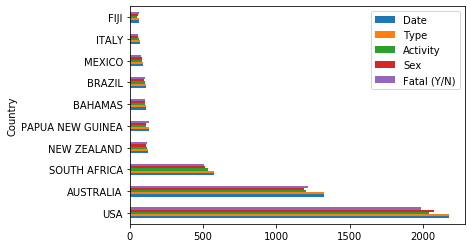

In [86]:
df.groupby("Country").count().sort_values("Sex",ascending = False).head(10).plot(kind = "barh")

In [87]:
dfpaises = df

In [88]:
#Nos quedamos con los top 3 countries para nuestro estudio pq la incidencia en otros países es baja
df = df[(df.Country == "USA") | (df.Country == "AUSTRALIA") | (df.Country == "SOUTH AFRICA")]

In [89]:
df

,Date,Type,Country,Activity,Sex,Fatal (Y/N)
0,25-Jun-2018,Boating,USA,Paddling,F,N
1,18-Jun-2018,Unprovoked,USA,Standing,F,N
2,09-Jun-2018,Invalid,USA,Surfing,M,N
3,08-Jun-2018,Unprovoked,AUSTRALIA,Surfing,M,N
5,03-Jun-2018,Unprovoked,AUSTRALIA,Kite surfing,M,N
...,...,...,...,...,...,...
6293,Before 1906,Unprovoked,AUSTRALIA,Fishing,M,Y
6296,Before 1906,Unprovoked,AUSTRALIA,Swimming,M,Y
6297,Before 1903,Unprovoked,AUSTRALIA,Diving,M,Y
6298,Before 1903,Unprovoked,AUSTRALIA,Pearl diving,M,Y


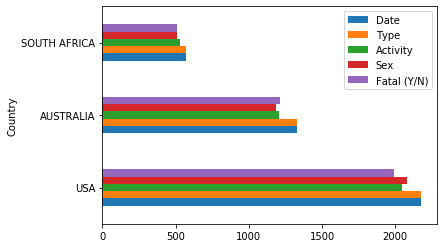

In [90]:
df.groupby("Country").count().sort_values("Sex",ascending = False).head(10).plot(kind = "barh")

### Formatting the "Sex" column

In [91]:
#Miramos cuántos resultados da por tipo de Sexo
df.groupby("Sex").count()

,Date,Type,Country,Activity,Fatal (Y/N)
Sex,,,,,
F,445,445,445,408,402
M,3328,3327,3328,3146,3044
M,2,2,2,2,2
N,1,1,1,1,1
lli,1,1,1,1,1


In [92]:
#Por qué hay dos filas cuyo género es "M" pero me lo cuenta como si fuera diferente?
#Nos cargamos las opciones que parecen ser un error, sobretodo porque son minoritarias
df = df[(df["Sex"] == "F") | (df["Sex"] == "M")]
df.groupby("Sex").count()

,Date,Type,Country,Activity,Fatal (Y/N)
Sex,,,,,
F,445,445,445,408,402
M,3328,3327,3328,3146,3044


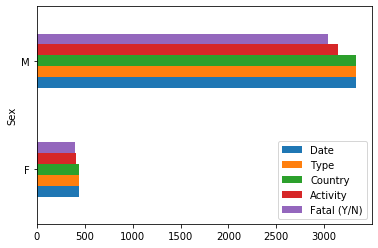

In [93]:
#Ya nos hemos quedado con la columna sex limpia
df.groupby("Sex").count().plot(kind = "barh")

### Formatting the "Type" column

In [94]:
#Vamos a ver los datos únicos que hay en Type para hacernos una idea de cómo está distribuído 
df["Type"].describe()

count           3772
unique             7
top       Unprovoked
freq            2936
Name: Type, dtype: object

In [95]:
#Miramos qué valores únicos tiene
df["Type"].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       nan, 'Boat', 'Sea Disaster'], dtype=object)

In [96]:
#Miramos qué tipos de ataques ha habido y su incidencia
df.groupby("Type").count()

,Date,Country,Activity,Sex,Fatal (Y/N)
Type,,,,,
Boat,18,18,16,18,18
Boating,71,71,70,71,71
Invalid,339,339,278,339,16
Provoked,352,352,336,352,352
Questionable,2,2,2,2,2
Sea Disaster,54,54,52,54,53
Unprovoked,2936,2936,2799,2936,2934


In [97]:
#Tenemos un par de outliers feos: Questionable y Boatomg
#Qué ha pasado con el Boatomg? Ahhhh quizás desapareció al hacer yo drop duplicates y/o na 
df[ (df["Type"] == "Questionable") | (df["Type"] == "Boatomg") ]

,Date,Type,Country,Activity,Sex,Fatal (Y/N)
16,09-May-2018,Questionable,AUSTRALIA,Surfing,M,N
20,25-Apr-2018,Questionable,AUSTRALIA,Surfing,M,N


In [98]:
#A ver cómo voy de shape:
df.shape

(3773, 6)

In [99]:
#Queremos desprendernos de Questionable y Boatomg
df = df[df.Type != "Questionable"]
df = df[df.Type != "Boatomg"]
df.shape

(3771, 6)

In [100]:
#Ahora queremos que las filas con "Boat" y "Boating" se agrupen, así que vamos a cambiar el type de Boat a Boating
df.Type.replace("Boat", "Boating", inplace = True)

In [101]:
#Creo que el cambio no se cambia
df.groupby("Type").count()

,Date,Country,Activity,Sex,Fatal (Y/N)
Type,,,,,
Boating,89,89,86,89,89
Invalid,339,339,278,339,16
Provoked,352,352,336,352,352
Sea Disaster,54,54,52,54,53
Unprovoked,2936,2936,2799,2936,2934


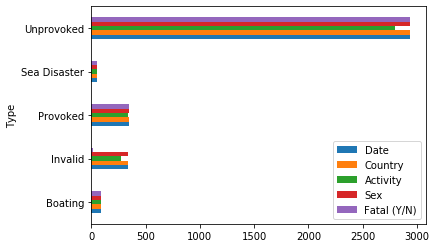

In [102]:
df.groupby("Type").count().plot(kind = "barh")

### Formatting the "Activity" column

In [103]:
df.head()

,Date,Type,Country,Activity,Sex,Fatal (Y/N)
0,25-Jun-2018,Boating,USA,Paddling,F,N
1,18-Jun-2018,Unprovoked,USA,Standing,F,N
2,09-Jun-2018,Invalid,USA,Surfing,M,N
3,08-Jun-2018,Unprovoked,AUSTRALIA,Surfing,M,N
5,03-Jun-2018,Unprovoked,AUSTRALIA,Kite surfing,M,N


In [104]:
#vamos a ver los valores únicos que hay en la columna activity y su proporción. Éstos son los top 15:
df.Activity.value_counts(ascending=False).head(15)

Surfing           795
Swimming          534
Fishing           201
Spearfishing      166
Wading            126
Bathing            85
Standing           81
Diving             56
Snorkeling         49
Scuba diving       46
Body surfing       44
Body boarding      43
Swimming           33
Treading water     30
Kayaking           28
Name: Activity, dtype: int64

In [105]:
#Cuenta registros de cada tipo de activity, estamos viendo los 10 más a menudo
df.groupby("Activity").count().sort_values(["Date"], ascending=False).head(10)

,Date,Type,Country,Sex,Fatal (Y/N)
Activity,,,,,
Surfing,795,794,795,795,764
Swimming,534,534,534,534,475
Fishing,201,201,201,201,191
Spearfishing,166,166,166,166,149
Wading,126,126,126,126,118
Bathing,85,85,85,85,76
Standing,81,81,81,81,80
Diving,56,56,56,56,48
Snorkeling,49,49,49,49,48


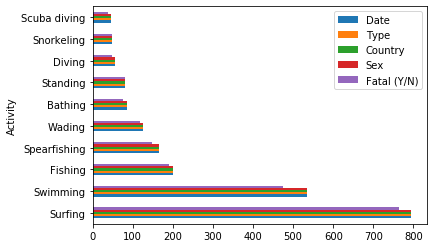

In [106]:
df.groupby("Activity").count().sort_values(["Date"], ascending=False).head(10).plot(kind = "barh")

### Formatting the "Fatality" column

In [107]:
#Miramos qué valores únicos hay en Fatal
df["Fatal (Y/N)"].unique()

array(['N', nan, 'Y', 'UNKNOWN', ' N'], dtype=object)

In [108]:
#Miramos cuántos " N" hay y los convertimos a "N"
df[df["Fatal (Y/N)"] == " N"].count()

Date           5
Type           5
Country        5
Activity       4
Sex            5
Fatal (Y/N)    5
dtype: int64

In [109]:
#Hacemos replace de " N" a "N"
df["Fatal (Y/N)"].replace(" N", "N", inplace = True)
df["Fatal (Y/N)"].unique()

array(['N', nan, 'Y', 'UNKNOWN'], dtype=object)

In [110]:
#Para practicar, vamos a igualar también los nan con los unknowns
df["Fatal (Y/N)"].replace("nan", "UNKNOWN", inplace = True)
df["Fatal (Y/N)"].unique()
#Porqué no me desaparecen los nans? Ya veo que no son strings, pero entonces cómo me los cargo?

array(['N', nan, 'Y', 'UNKNOWN'], dtype=object)

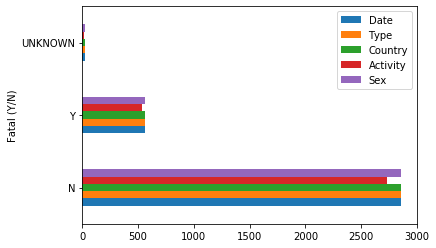

In [111]:
df.groupby("Fatal (Y/N)").count().sort_values(["Date"], ascending=False).head(10).plot(kind = "barh")
#Oh, aquí ya no aparecen los nans

### Formatting the  "Date" column

#### Formatting column "Date" from "object" format to a "datetime" format

In [112]:
#Vamos a inspeccionar la columna "Date"
df["Date"].describe()

count            3771
unique           3448
top       05-Oct-2003
freq                5
Name: Date, dtype: object

In [113]:
from datetime import datetime

In [114]:
#He intentado tres millones de cosas con las dates y no conseguía nada fructífero
#No he podido cambiarles el formato de object a date con astype

#df['Date'] = df['Date'].astype('datetime64[ns]')
#df['Date'].dtype


In [115]:
#print(set(df['Date']))
#Lo dejo comentado porque esta celda ocupa mucho ;)

In [116]:
df.Date.nunique()

3448

In [117]:
#Vamos a hacer algunos cambios manuales en la columna Date ya que no lo sé hacer con la teoría de date time
df['Date'] = df['Date'].str.replace('Before ', '')
df['Date'] = df['Date'].str.replace('After ', '')
df['Date'] = df['Date'].str.replace('  ', '')
df['Date'] = df['Date'].str.replace('Reported ', '')
df['Date'] = df['Date'].str.replace('Summer ', '')
df['Date'] = df['Date'].str.replace('Circa ', '')
df['Date'] = df['Date'].str.replace('Early ', '')

df.Date.nunique()
#print(set(df['Date']))
#Lo dejo comentado porque esta celda ocupa mucho ;)

3430

In [118]:
import re

In [119]:
#Vamos a crear la columna "Year" que se coja las secuencias de 4 dígitos de la columna "Date"
df["Year"] = df.Date.str.extract(r'(\d\d\d\d)')
df["Year"].unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2008', '2010', '2009', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1954',
       '1963', '1962', '1961', '1960', '1959', '1958', '1957', '1956',
       '1955', '1953', '1952', '1951', '1950', '1949', '1948', '1947',
       '1946', '1945', '1944', nan, '1943', '1942', '1941', '1940',
       '1939', '1938', '1937', '1936', '1935', '1934', '1933', '1932',
       '1931', '1930', '1929', '1928', '1927', '1926', '1925', '1924',
       '1923', '1922', '1921', '1920', '1919', '1918', '1917', '1916',
       '1915', '1914', '1913', '1912', '1911', '1910', '1909', '1908',
       '1

In [120]:
df.head()

,Date,Type,Country,Activity,Sex,Fatal (Y/N),Year
0,25-Jun-2018,Boating,USA,Paddling,F,N,2018
1,18-Jun-2018,Unprovoked,USA,Standing,F,N,2018
2,09-Jun-2018,Invalid,USA,Surfing,M,N,2018
3,08-Jun-2018,Unprovoked,AUSTRALIA,Surfing,M,N,2018
5,03-Jun-2018,Unprovoked,AUSTRALIA,Kite surfing,M,N,2018


In [121]:
df.groupby("Year").count()

,Date,Type,Country,Activity,Sex,Fatal (Y/N)
Year,,,,,,
1642,1,1,1,1,1,1
1751,1,1,1,1,1,1
1771,1,1,1,1,1,1
1779,1,1,1,1,1,1
1780,1,1,1,1,1,1
...,...,...,...,...,...,...
2014,91,91,91,89,91,87
2015,113,112,113,107,113,104
2016,93,93,93,89,93,87


In [122]:
#Ahora me dice que no hay ningún nan pero yo lo veo en el set de Year
df[df["Year"] == "NaN"].head()

,Date,Type,Country,Activity,Sex,Fatal (Y/N),Year


In [123]:
yearnan = df[df.Year.isnull() == True]

In [124]:
#esto es una mierda y no me lo saco
#df = df["Year"].dropna(yearnan)

In [125]:
#no me deja
#df.Year.astype(int)

In [126]:
#from datetime import datetime
#df = pd.DataFrame({'Date':['25-Jun-2018']})
#from functools import partial
#to_datetime = partial(pd.to_datetime, format='%d-%b-%Y')
#reshaped_sharks['Date'] = reshaped_sharks['Date'].apply(to_datetime)
#reshaped_sharks.dtypes

In [127]:
pd.unique(df["Year"])

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2008', '2010', '2009', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1984', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1954',
       '1963', '1962', '1961', '1960', '1959', '1958', '1957', '1956',
       '1955', '1953', '1952', '1951', '1950', '1949', '1948', '1947',
       '1946', '1945', '1944', nan, '1943', '1942', '1941', '1940',
       '1939', '1938', '1937', '1936', '1935', '1934', '1933', '1932',
       '1931', '1930', '1929', '1928', '1927', '1926', '1925', '1924',
       '1923', '1922', '1921', '1920', '1919', '1918', '1917', '1916',
       '1915', '1914', '1913', '1912', '1911', '1910', '1909', '1908',
       '1

## Explore the data:

Visualicemos qué conclusiones podemos sacar de los datos limpitos

### Check if there are still outliers:

In [128]:
stats = df.describe().transpose()
stats

,count,unique,top,freq
Date,3771,3430,05-Oct-2003,5
Type,3770,5,Unprovoked,2936
Country,3771,3,USA,2078
Activity,3552,853,Surfing,795
Sex,3771,2,M,3326
Fatal (Y/N),3444,3,N,2858
Year,3764,195,2015,113


### Pregunta final: Cuál es el perfil y bajo qué circunstancias hay más probabilidades de morir?
    - Sexo
    - País
    - Actividad
    - Type
    - Fecha (se siente, no)
    - Fatality
    

In [129]:
df.groupby("Country").count().sort_values("Country", ascending = False).head()

,Date,Type,Activity,Sex,Fatal (Y/N),Year
Country,,,,,,
USA,2078,2078,1960,2078,1907,2077
SOUTH AFRICA,511,511,487,511,456,508
AUSTRALIA,1182,1181,1105,1182,1081,1179


### Pregunta final: Cuál es el perfil y bajo qué circunstancias hay más probabilidades de morir?

In [145]:
#Éste precioso for no me lo he sacado sola, yo habría sido incapaz :(
for i in df.columns:
    if i not in ("Date", "Year"):
        df1=df[df["Fatal (Y/N)"] == "Y"].groupby(i).count().sort_values("Year", ascending = False)
        print(i, ":", df1.index.values[0],"\t")

Type : Unprovoked 	
Country : AUSTRALIA 	
Activity : Swimming 	
Sex : M 	
Fatal (Y/N) : Y 	


### Pregunta final bonus: Cuál es el perfil y bajo qué circunstancias hay más probabilidades de morir en España?


In [143]:
#Vamos a ver qué tal se le da a España
for i in dfpaises.columns:
    if i not in ("Date", "Year"):
        df1=dfpaises[(dfpaises["Country"] == "SPAIN") & (dfpaises["Fatal (Y/N)"] == "Y")].groupby(i).count().sort_values("Type", ascending = False)
        print(i, ":", df1.index.values[0],"\t")

Type : Unprovoked 	
Country : SPAIN 	
Activity : Bathing 	
Sex : M 	
Fatal (Y/N) : Y 	


In [150]:
df1.to_csv("./PR02_csv_ProjectSharks.csv")

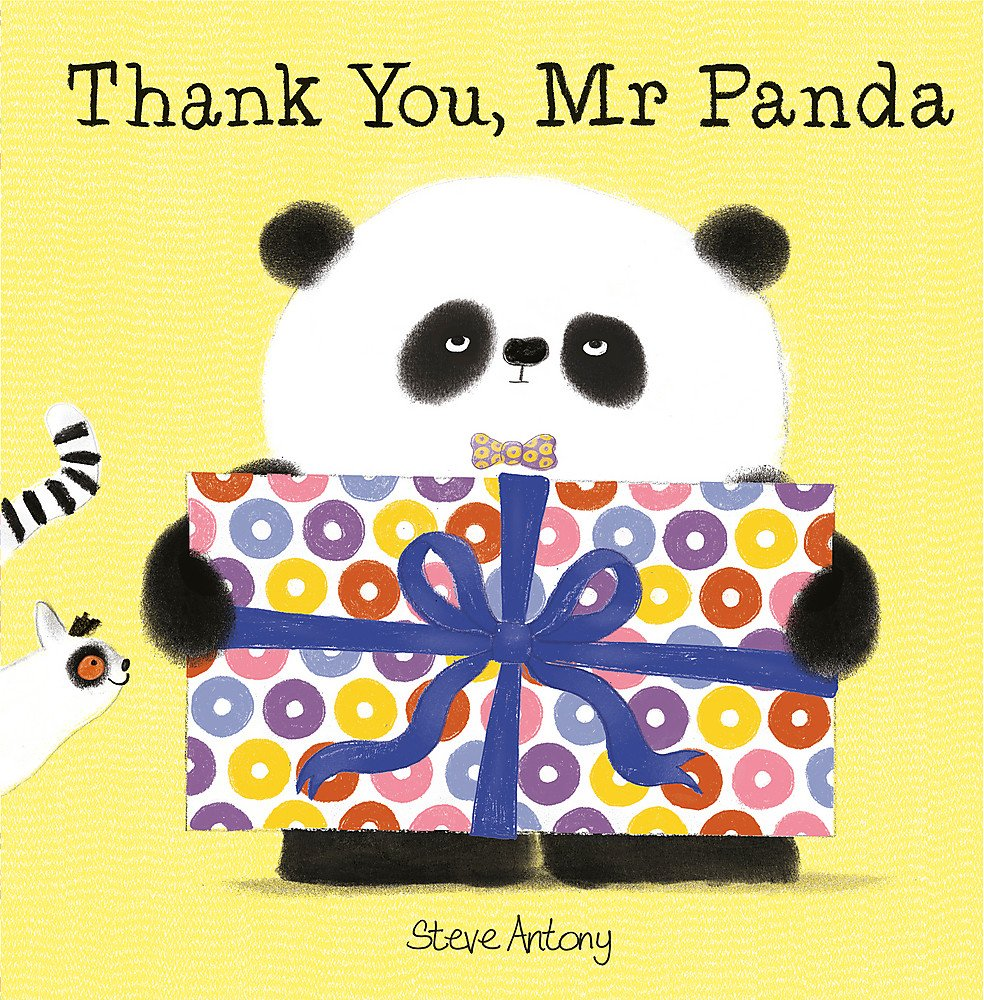